In [190]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [191]:
df = pd.read_csv('wine_data.csv')

In [193]:
df.columns

Index(['points', 'price', 'cty_france', 'cty_italy', 'cty_us', 'prov_alsace',
       'prov_beaujolais', 'prov_bordeaux', 'prov_burgundy', 'prov_california',
       'prov_central_italy', 'prov_champagne', 'prov_colorado',
       'prov_france_other', 'prov_idaho', 'prov_languedoc-roussillon',
       'prov_loire_valley', 'prov_lombardy', 'prov_michigan', 'prov_new_york',
       'prov_northeastern_italy', 'prov_oregon', 'prov_piedmont',
       'prov_provence', 'prov_rhône_valley', 'prov_sicily_and_sardinia',
       'prov_southern_italy', 'prov_southwest_france', 'prov_texas',
       'prov_tuscany', 'prov_veneto', 'prov_virginia', 'prov_washington',
       'taster_alexander_peartree', 'taster_anna_lee_c._iijima',
       'taster_anne_krebiehl mw', 'taster_carrie_dykes', 'taster_jim_gordon',
       'taster_joe_czerwinski', 'taster_kerin_o’keefe', 'taster_lauren_buzzeo',
       'taster_matt_kettmann', 'taster_paul_gregutt', 'taster_roger_voss',
       'taster_sean_p._sullivan', 'taster_susan_k

In [192]:
outcome = 'points'

x_cols= ['price', 'prov_alsace',
       'prov_beaujolais', 'prov_bordeaux', 'prov_burgundy', 'prov_california',
       'prov_central_italy', 'prov_champagne', 'prov_colorado',
       'prov_france_other', 'prov_idaho', 'prov_languedoc_roussillon',
       'prov_loire_valley', 'prov_lombardy', 'prov_michigan', 'prov_new_york',
       'prov_northeastern_italy', 'prov_oregon', 'prov_piedmont',
       'prov_provence', 'prov_rhône_valley', 'prov_sicily_and_sardinia',
       'prov_southern_italy', 'prov_southwest_france', 'prov_texas',
       'prov_tuscany', 'prov_veneto', 'prov_virginia', 'prov_washington',
       'taster_alexander_peartree', 'taster_anna_lee_c_iijima',
       'taster_anne_krebiehl_mw', 'taster_carrie_dykes', 'taster_jim_gordon',
       'taster_joe_czerwinski', 'taster_kerin_okeefe', 'taster_lauren_buzzeo',
       'taster_matt_kettmann', 'taster_paul_gregutt', 'taster_roger_voss',
       'taster_sean_p_sullivan', 'taster_susan_kostrzewa',
       'taster_undisclosed', 'taster_virginie_boone',
       'grape_cabernet_sauvignon', 'grape_chardonnay', 'grape_malbec',
       'grape_merlot', 'grape_pinot_grigio', 'grape_pinot_noir',
       'grape_red_blend', 'grape_riesling', 'grape_rosé',
       'grape_sauvignon_blanc', 'grape_white_blend', 'grape_zinfandel',
       'vintage_2000', 'vintage_2001', 'vintage_2002', 'vintage_2003',
       'vintage_2004', 'vintage_2005', 'vintage_2006', 'vintage_2007',
       'vintage_2008', 'vintage_2009', 'vintage_2010', 'vintage_2011',
       'vintage_2012', 'vintage_2013', 'vintage_2014', 'vintage_2015',
       'vintage_2016']

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'prov_languedoc_roussillon' is not defined
    points~price+prov_alsace+prov_beaujolais+prov_bordeaux+prov_burgundy+prov_california+prov_central_italy+prov_champagne+prov_colorado+prov_france_other+prov_idaho+prov_languedoc_roussillon+prov_loire_valley+prov_lombardy+prov_michigan+prov_new_york+prov_northeastern_italy+prov_oregon+prov_piedmont+prov_provence+prov_rhône_valley+prov_sicily_and_sardinia+prov_southern_italy+prov_southwest_france+prov_texas+prov_tuscany+prov_veneto+prov_virginia+prov_washington+taster_alexander_peartree+taster_anna_lee_c_iijima+taster_anne_krebiehl_mw+taster_carrie_dykes+taster_jim_gordon+taster_joe_czerwinski+taster_kerin_okeefe+taster_lauren_buzzeo+taster_matt_kettmann+taster_paul_gregutt+taster_roger_voss+taster_sean_p_sullivan+taster_susan_kostrzewa+taster_undisclosed+taster_virginie_boone+grape_cabernet_sauvignon+grape_chardonnay+grape_malbec+grape_merlot+grape_pinot_grigio+grape_pinot_noir+grape_red_blend+grape_riesling+grape_rosé+grape_sauvignon_blanc+grape_white_blend+grape_zinfandel+vintage_2000+vintage_2001+vintage_2002+vintage_2003+vintage_2004+vintage_2005+vintage_2006+vintage_2007+vintage_2008+vintage_2009+vintage_2010+vintage_2011+vintage_2012+vintage_2013+vintage_2014+vintage_2015+vintage_2016
                                                                                                                                                                      ^^^^^^^^^^^^^^^^^^^^^^^^^

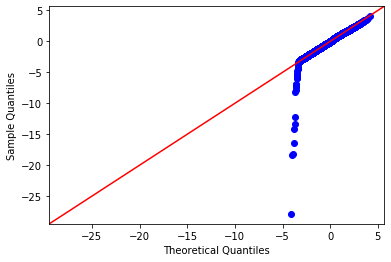

In [52]:
fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line='45', fit = True);

In [24]:
pd.plotting.scatter_matrix(df[x_cols], figsize = (10,12));

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1c2595e488> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1c25bc20d0> (for post_execute):


KeyboardInterrupt: 

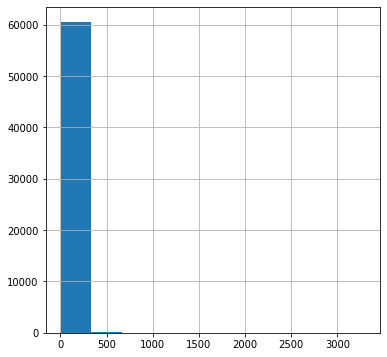

In [71]:

df['price'].hist(figsize=(6,6));


In [72]:
df['logprice'] = np.log(df['price'])

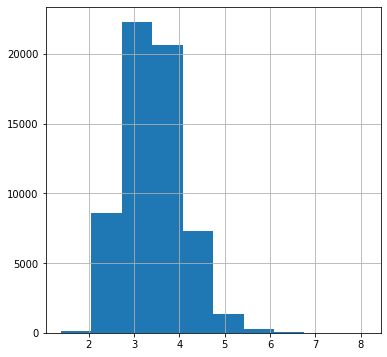

In [73]:
df['logprice'].hist(figsize=(6,6));

In [74]:
wine_prices = df['logprice']

In [75]:
scaled_wine_prices = (wine_prices - np.mean(wine_prices)) / np.sqrt(np.var(wine_prices))

In [76]:
df['scaled_logprice'] = scaled_wine_prices

In [114]:
outcome = 'points'

x_cols= ['scaled_logprice', 'cty_italy', 'cty_us', 
       'prov_beaujolais', 'prov_bordeaux', 'prov_burgundy', 'prov_california',
       'prov_central_italy', 'prov_champagne', 'prov_colorado',
       'prov_france_other', 'prov_idaho', 'prov_languedoc_roussillon',
       'prov_loire_valley', 'prov_lombardy', 'prov_michigan', 'prov_new_york',
       'prov_northeastern_italy', 'prov_oregon', 'prov_piedmont',
       'prov_provence', 'prov_rhône_valley', 'prov_sicily_and_sardinia',
       'prov_southern_italy', 'prov_southwest_france', 'prov_texas',
       'prov_tuscany', 'prov_veneto', 'prov_virginia', 'prov_washington',
       'taster_alexander_peartree', 'taster_anna_lee_c_iijima',
       'taster_anne_krebiehl_mw', 'taster_carrie_dykes', 'taster_jim_gordon',
       'taster_joe_czerwinski', 'taster_kerin_okeefe', 'taster_lauren_buzzeo',
       'taster_matt_kettmann', 'taster_paul_gregutt', 'taster_roger_voss',
       'taster_sean_p_sullivan', 'taster_susan_kostrzewa',
       'taster_virginie_boone', 'grape_chardonnay', 'grape_malbec',
       'grape_merlot', 'grape_pinot_grigio', 'grape_pinot_noir',
       'grape_red_blend', 'grape_riesling', 'grape_rosé',
       'grape_sauvignon_blanc', 'grape_white_blend', 'grape_zinfandel',
       'vintage_2001', 'vintage_2002', 'vintage_2003',
       'vintage_2004', 'vintage_2005', 'vintage_2006', 'vintage_2007',
       'vintage_2008', 'vintage_2009', 'vintage_2010', 'vintage_2011',
       'vintage_2012', 'vintage_2013', 'vintage_2014', 'vintage_2015',
       'vintage_2016']

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     624.1
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:21:03   Log-Likelihood:            -1.3900e+05
No. Observations:               60657   AIC:                         2.781e+05
Df Residuals:                   60587   BIC:                         2.788e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    87.3198      0.205    425.136      0.000      86.917      87.722
scaled_logprice               1.9739      0.011    175.204      0.000       1.952       1.996
cty_italy                     1.1005      0.154      7.137      0.000       0.798       1.403
cty_us                       -0.7887      0.238     -3.316      0.001      -1.255      -0.323
prov_beaujolais               1.0261      0.144      7.128      0.000       0.744       1.308
prov_bordeaux                 0.5694      0.112      5.073      0.000       0.349       0.789
prov_burgundy                -0.1111      0.112     -0.993      0.321      -0.330       0.108
prov_california               0.9691      0.188      5.163      0.000       0.601       1.337
prov_central_italy           -0.0137      0.080     -0.171      0.864      -0.171       0.143
prov_champagne                0.9312      0.248      3.756      0.000       0.445       1.417
prov_colorado                -0.9302      0.353     -2.638      0.008      -1.621      -0.239
prov_france_other             0.1145      0.161      0.710      0.478      -0.202       0.431
prov_idaho                    0.4142      0.403      1.027      0.305      -0.376       1.205
prov_languedoc_roussillon     1.3332      0.256      5.210      0.000       0.832       1.835
prov_loire_valley             0.8831      0.120      7.378      0.000       0.649       1.118
prov_lombardy                 0.2532      0.135      1.869      0.062      -0.012       0.519
prov_michigan                -1.0968      0.316     -3.471      0.001      -1.716      -0.477
prov_new_york                 0.2691      0.235      1.147      0.251      -0.191       0.729
prov_northeastern_italy      -0.1340      0.067     -1.998      0.046      -0.265      -0.003
prov_oregon                   0.3394      0.395      0.859      0.390      -0.435       1.114
prov_piedmont                 0.1452      0.060      2.436      0.015       0.028       0.262
prov_provence                 1.4996      0.137     10.929      0.000       1.231       1.769
prov_rhône_valley             1.7267      0.230      7.501      0.000       1.275       2.178
prov_sicily_and_sardinia      0.4467      0.069      6.452      0.000       0.311       0.582
prov_southern_italy           0.3120      0.078      4.008      0.000       0.159       0.465
prov_southwest_france         1.6755      0.128     13.050      0.000       1.424       1.927
prov_texas                   -1.2717      0.339     -3.747      0.000      -1.937      -0.607
prov_tuscany                  0.3430      0.049      6.957      0.000       0.246       0.440
prov_veneto                  -0.2519      0.069     -3.650      0.000      -0.387      -0.117
prov_virginia                -0.7558      0.198     -3.811      0.000      

## Test for Normality

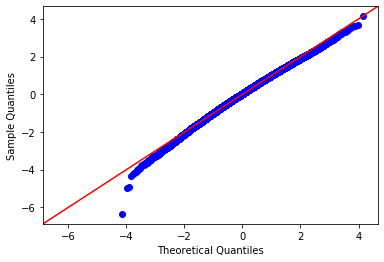

In [115]:
fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line='45', fit = True);

## Test for homoscedacity

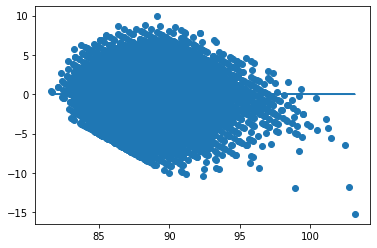

In [116]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

## Test for multicolinearity 

In [117]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
multicolin_total = list(zip(x_cols, vif))

//anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


## Ridge Lasso Regression

In [120]:
y = df[['points']]
X = df.drop(['points', 'price'], axis=1)

In [124]:
#test train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [128]:
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

In [179]:
#ridge regression
ridge = Ridge(alpha=1)
ridge.fit(X_train_transformed, y_train)

#Lasso regression
lasso = Lasso(alpha=1)
lasso.fit(X_train_transformed, y_train)

#linear regression
lin = LinearRegression()
lin.fit(X_train_transformed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
X_train_transformed.shape

(42459, 71)

In [181]:
X_test_transformed.shape

(18198, 71)

In [182]:
#ridge predictions
y_h_ridge_train = ridge.predict(X_train_transformed)
y_h_ridge_test = ridge.predict(X_test_transformed)

#generate predications for the lasso regression
y_h_lasso_train = np.reshape(lasso.predict(X_train_transformed), (42459, 1))
y_h_lasso_test = np.reshape(lasso.predict(X_test_transformed), (18198, 1))

#linear predications
y_h_lin_train = lin.predict(X_train_transformed)
y_h_lin_test = lin.predict(X_test_transformed)

In [183]:
print('Train RMSE Ridge Model', np.sqrt(np.sum((y_train - y_h_ridge_train)**2)/df.shape[0]))
print('Test RMSE Ridge Model', np.sqrt(np.sum((y_test - y_h_ridge_test)**2)/df.shape[0]))
print('\n')

print('Train RMSE Lasso Model', np.sqrt(np.sum((y_train - y_h_lasso_train)**2)/df.shape[0]))
print('Test RMSE Lasso Model', np.sqrt(np.sum((y_test - y_h_lasso_test)**2)/df.shape[0]))
print('\n')

print('Train RMSE Unpenalized Linear Model', np.sqrt(np.sum((y_train - lin.predict(X_train_transformed))**2)/df.shape[0]))
print('Test RMSE Unpenalized Linear Model', np.sqrt(np.sum((y_test - lin.predict(X_test_transformed))**2)/df.shape[0]))

Train RMSE Ridge Model points    2.002771
dtype: float64
Test RMSE Ridge Model points    1.310843
dtype: float64


Train RMSE Lasso Model points    2.279102
dtype: float64
Test RMSE Lasso Model points    1.483078
dtype: float64


Train RMSE Unpenalized Linear Model points    2.002775
dtype: float64
Test RMSE Unpenalized Linear Model points    1.310813
dtype: float64


In [184]:
print('Lasso parameter coefficients:', lasso.coef_)

Lasso parameter coefficients: [ 0.         -0.         -0.         -0.          0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.          0.         -0.         -0.         -0.          0.
  0.          0.          0.         -0.         -0.          0.
 -0.          0.         -0.         -0.          0.         -0.
 -0.          0.         -0.          0.          0.          0.
 -0.          0.          0.          0.          0.         -0.
  0.          0.          0.         -0.         -0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.          0.          0.         -0.          0.85416336]


In [185]:
df

,points,price,cty_italy,cty_us,prov_beaujolais,prov_bordeaux,prov_burgundy,prov_california,prov_central_italy,prov_champagne,...,vintage_2008,vintage_2009,vintage_2010,vintage_2011,vintage_2012,vintage_2013,vintage_2014,vintage_2015,vintage_2016,scaled_logprice
0,100,80.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.515902
1,100,460.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.251530
2,100,150.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2.499003
3,100,450.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4.217157
4,100,1500.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6.100088
5,100,550.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4.530992
6,100,270.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.418261
7,100,848.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5.208115
8,100,200.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.948918
9,100,359.0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3.863825
